In [43]:
import os
from os.path import join, exists, basename, dirname, expanduser
from glob import glob
import shutil
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pickle

In [7]:
with open(expanduser(f'~/uavsar/results/uavsar_snotel_sd/res_df_updated'), 'rb') as f:
    res = pickle.load(f)

In [52]:
t_res = pd.DataFrame()
for i, (k, v) in enumerate(res.items()):
    if i == i:
        for site, data in v['snotel_results'].items():
            cor = data['cor']
            if type(data['meso']) ==  gpd.GeoDataFrame:
                if 'AIR TEMP' in data['meso'].columns and 'SNOWDEPTH' in data['meso'].columns:
                    mean_t = data['meso']['AIR TEMP'].max()
                    snow_d = data['meso']['SNOWDEPTH'].min()
                if mean_t < 60 and snow_d > 0:
                    t_res.loc[site,['temp','coh']] = mean_t, cor

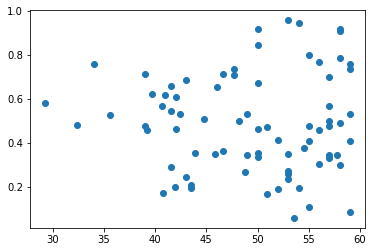

In [53]:
plt.scatter(t_res.temp, t_res.coh)